# Lab 8: Spectral Analysis

### Required Packages

In [1]:
library(astsa)

### Generating data

In [2]:
set.seed(1999) # so you can reproduce the result 2 
x = rnorm(10,0,1)
y = x + rnorm(10,0,1)
summary(fit <- lm(y~x))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8851 -0.3867  0.1325  0.3896  0.6561 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.2576     0.1892   1.362   0.2104  
x             0.4577     0.2016   2.270   0.0529 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.58 on 8 degrees of freedom
Multiple R-squared:  0.3918,	Adjusted R-squared:  0.3157 
F-statistic: 5.153 on 1 and 8 DF,  p-value: 0.05289


### Regressing lagged values of a time series

In [6]:
# Careful use of lm() for lagged values
data(jj) 
ded = ts.intersect(jj, jj4=lag(jj,-4), dframe=TRUE)
fit = lm(jj~jj4, data=ded, na.action=NULL) 
summary(fit)

# Using dynlm for lagged regressions
install.packages("dyn")
install.packages("dynlm")
library("dyn")
library("dynlm")
data(jj)
jjs <- ts(jj, frequency=4, start=c(1961,1), end=c(1981,4))
dynamic<- dynlm(jjs ~ 1 + L(jjs, 4)) 
summary(dynamic)


Call:
lm(formula = jj ~ jj4, data = ded, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13214 -0.18022 -0.01521  0.13863  1.18542 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10029    0.07074   1.418     0.16    
jj4          1.13881    0.01239  91.919   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4152 on 78 degrees of freedom
Multiple R-squared:  0.9909,	Adjusted R-squared:  0.9907 
F-statistic:  8449 on 1 and 78 DF,  p-value: < 2.2e-16



The downloaded binary packages are in
	/var/folders/t2/ws8k9yr15qx2kkrh33h841rr0000gp/T//RtmpuZu7Vj/downloaded_packages

The downloaded binary packages are in
	/var/folders/t2/ws8k9yr15qx2kkrh33h841rr0000gp/T//RtmpuZu7Vj/downloaded_packages



Time series regression with "ts" data:
Start = 1962(1), End = 1981(4)

Call:
dynlm(formula = jjs ~ 1 + L(jjs, 4))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13214 -0.18022 -0.01521  0.13863  1.18542 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10029    0.07074   1.418     0.16    
L(jjs, 4)    1.13881    0.01239  91.919   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4152 on 78 degrees of freedom
Multiple R-squared:  0.9909,	Adjusted R-squared:  0.9907 
F-statistic:  8449 on 1 and 78 DF,  p-value: < 2.2e-16


### Spectral density and ARMA models

#### Spectral density AR(1) and MA(1)

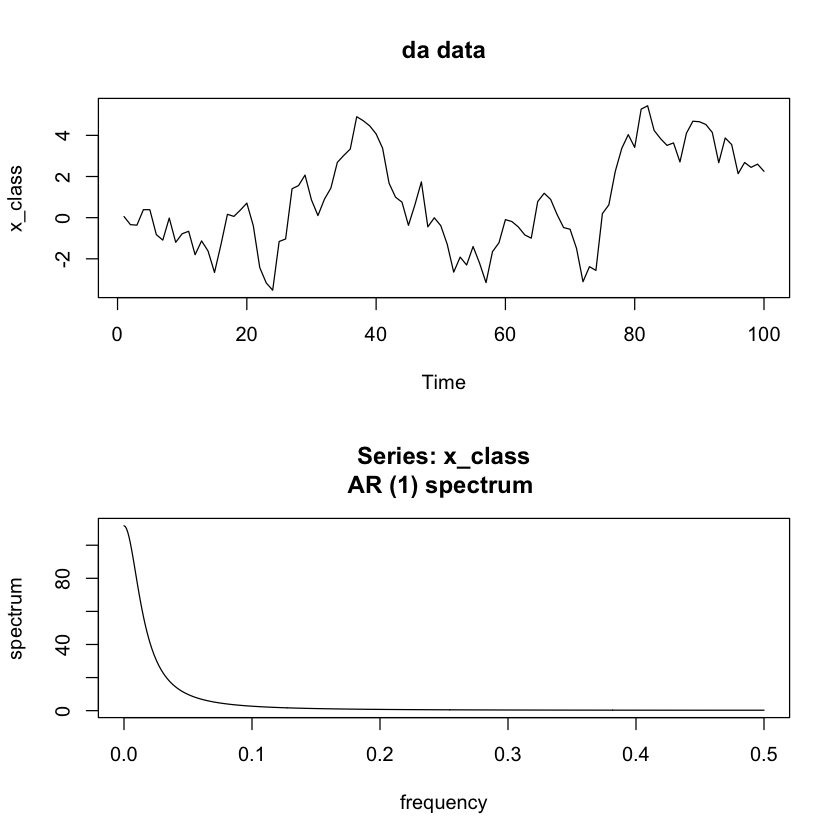

In [7]:
x_class = arima.sim(list(order=c(1,0,0), ar=c(.9)), n=100) # some data
par(mfcol=c(2,1))
plot.ts(x_class, main="da data")
spec.ar(x_class, log="no")

#### Spectral density AR(2)

[1] 0.5555556+0.8958064i 0.5555556-0.8958064i

[1] 0.1616497

ERROR: Error in plot.window(...): invalid "log=no" specification


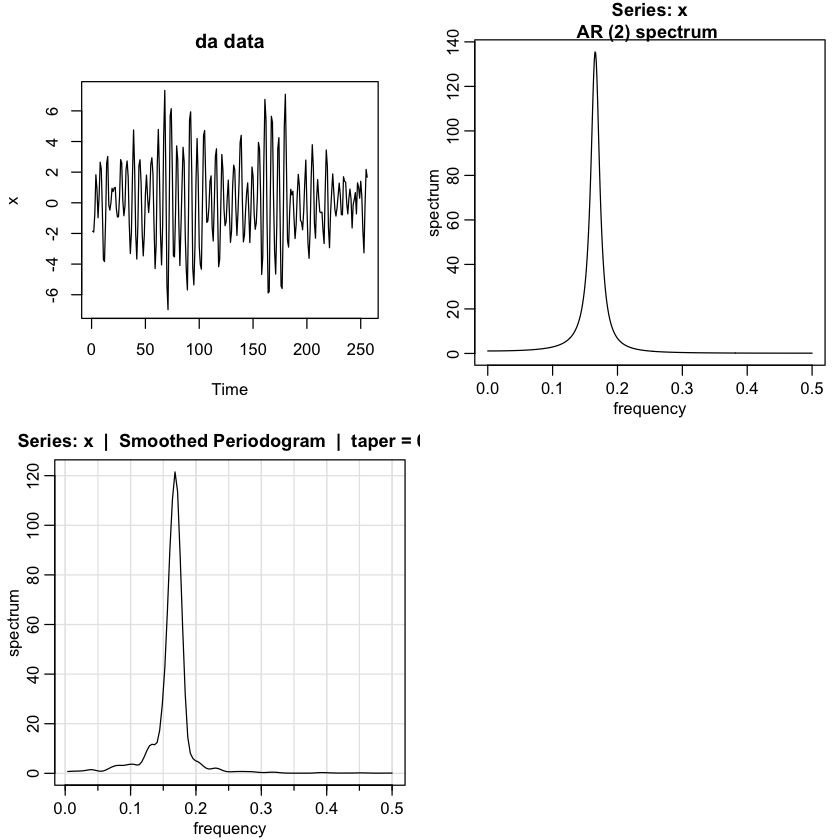

In [8]:
x = arima.sim(list(order=c(2,0,0), ar=c(1,-.9)), n=2^8) # some data
(u = polyroot(c(1,-1,.9)))            # x is AR(2) w/complex roots                          
Arg(u[1])/(2*pi)                      # dominant frequency around .16:
par(mfcol=c(2,2))
plot.ts(x, main="da data")  
mvspec(x, spans=c(5,5), plot=TRUE, taper=.1, log="no") # nonparametric spectral estimate                           
spec.ar(x, log="no")                     # parametric spectral estimate
arma.spec(ar = c(1,-.9), log="no")       # model spectral density

### Hamilton Industrial Production Example

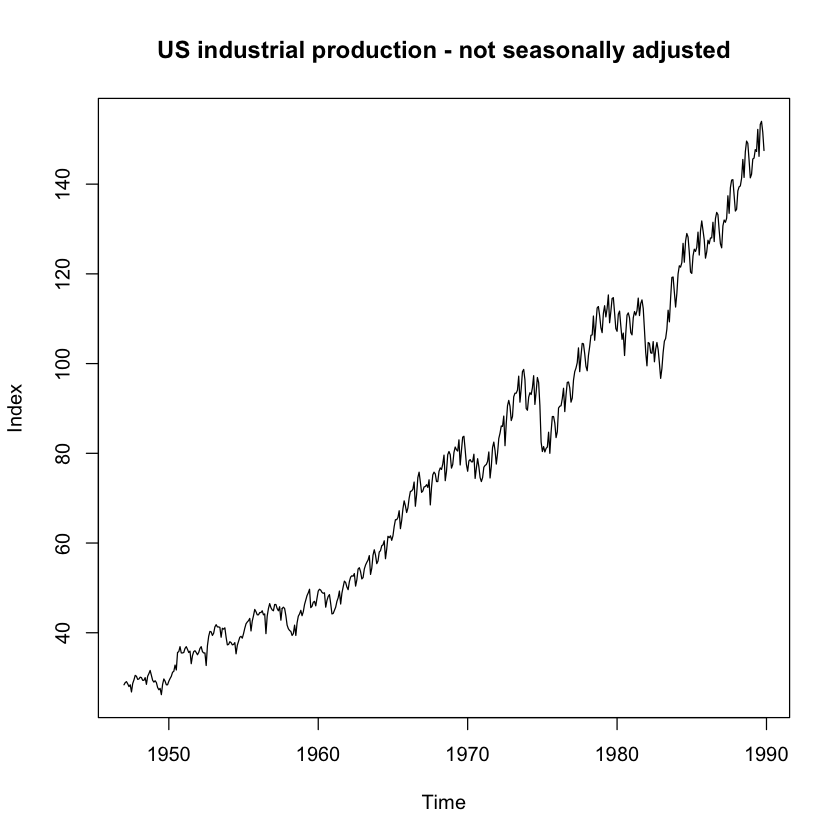

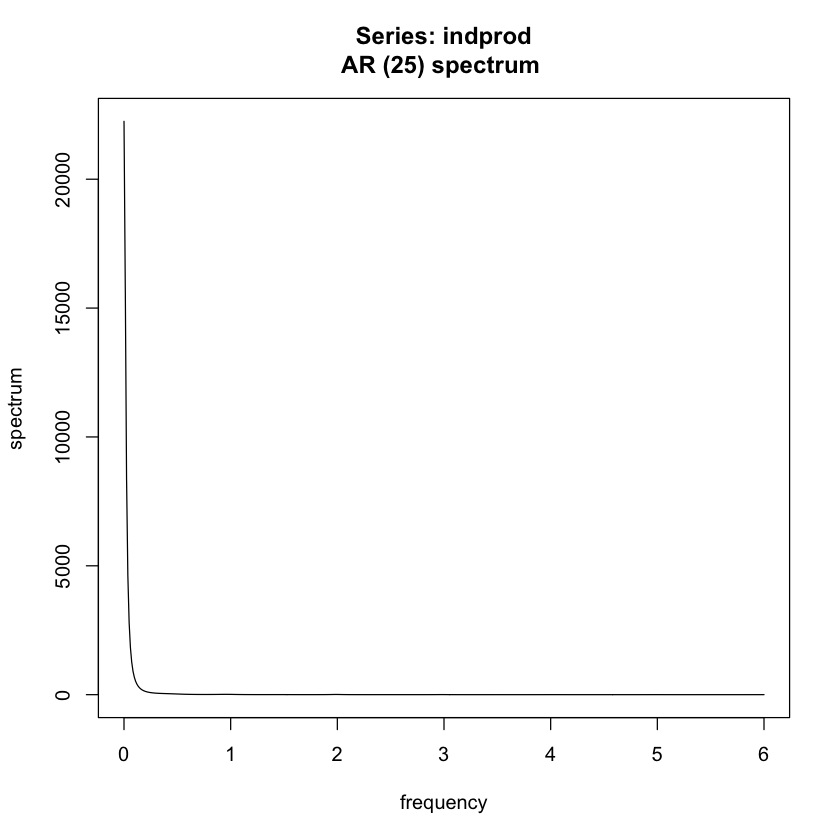

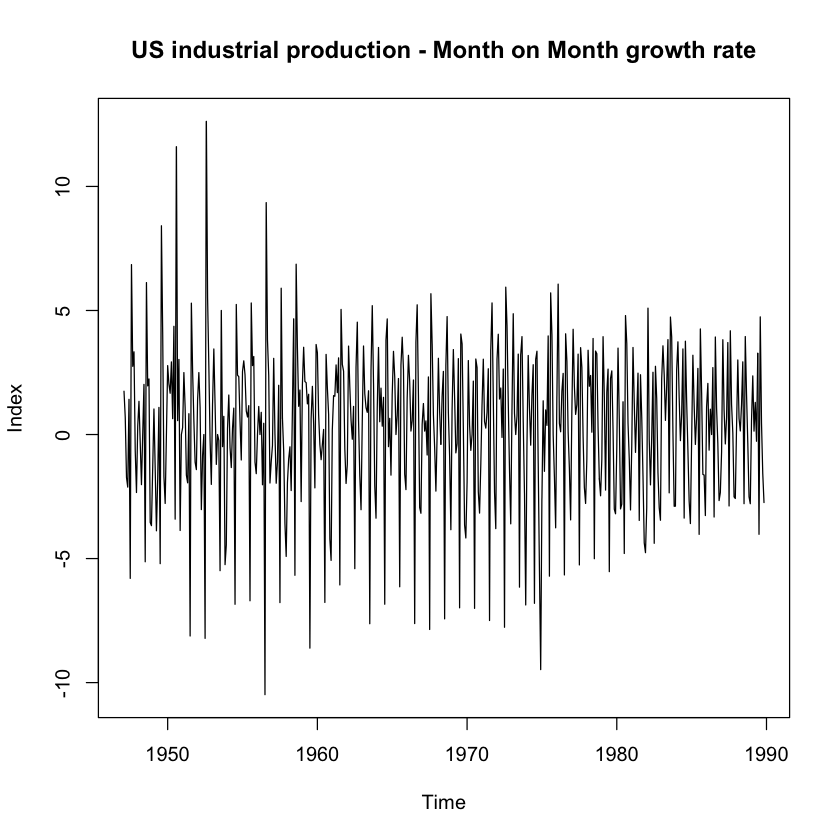

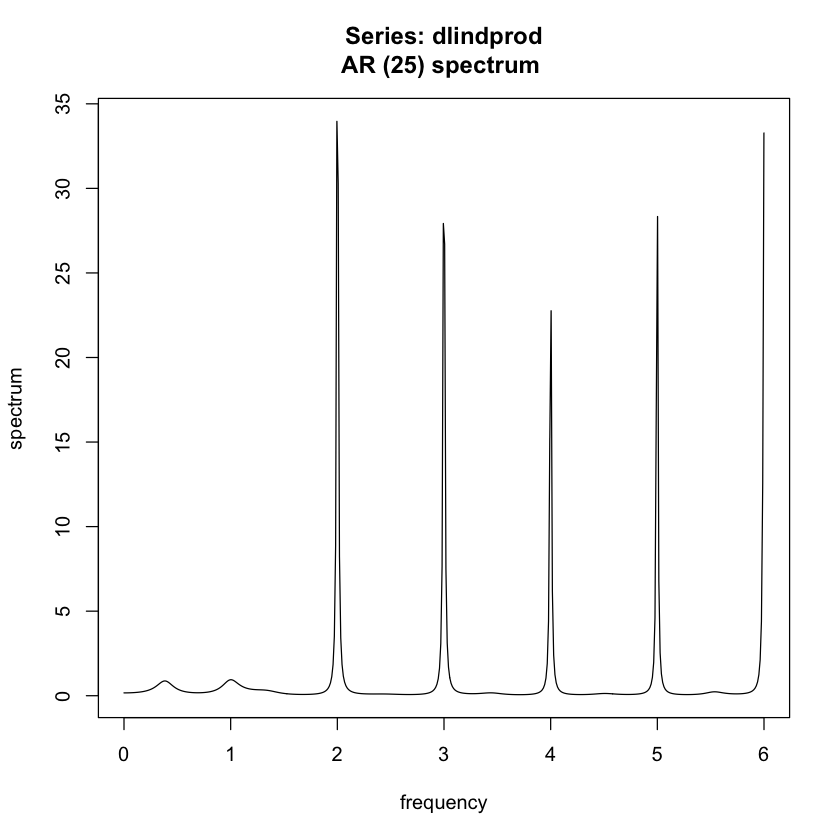

In [9]:
data <- read.csv("./data/indprod.csv", header=TRUE)
indprod <- ts(data, frequency=12, start=c(1947,1))
dlindprod <- 100*diff(log(indprod))
plot(indprod, ylab="Index", main="US industrial production - not seasonally adjusted")
spec.ar(indprod, log="no", method = "yule-walker")
T<-length(indprod)
plot(dlindprod, ylab="Index", main="US industrial production - Month on Month growth rate")
spec.ar(dlindprod, log="no", method = "yule-walker")

#### Raw Periodogram

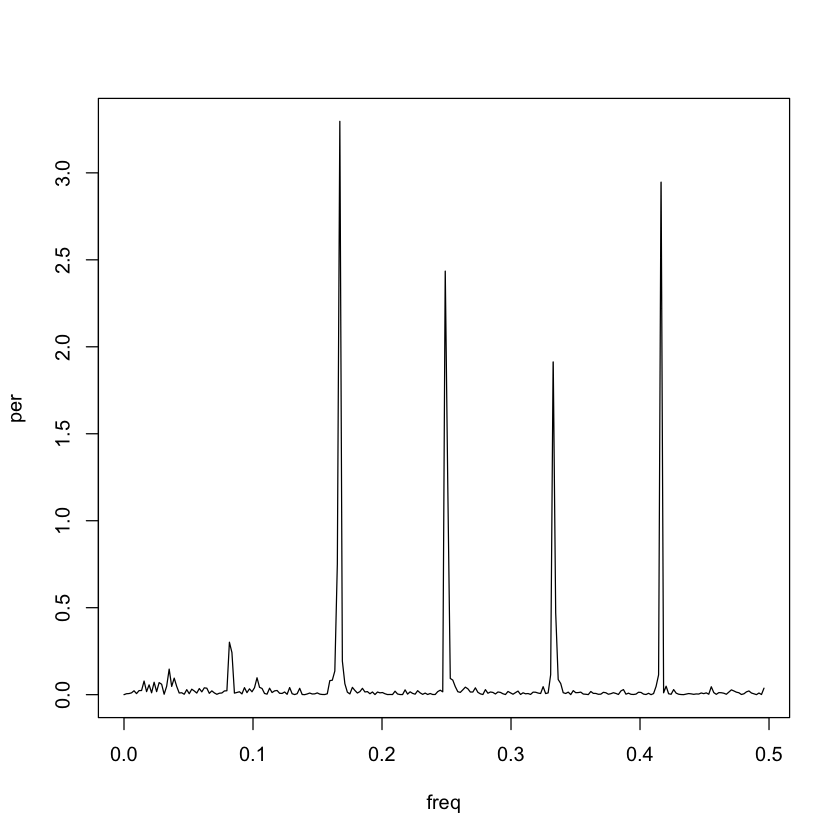

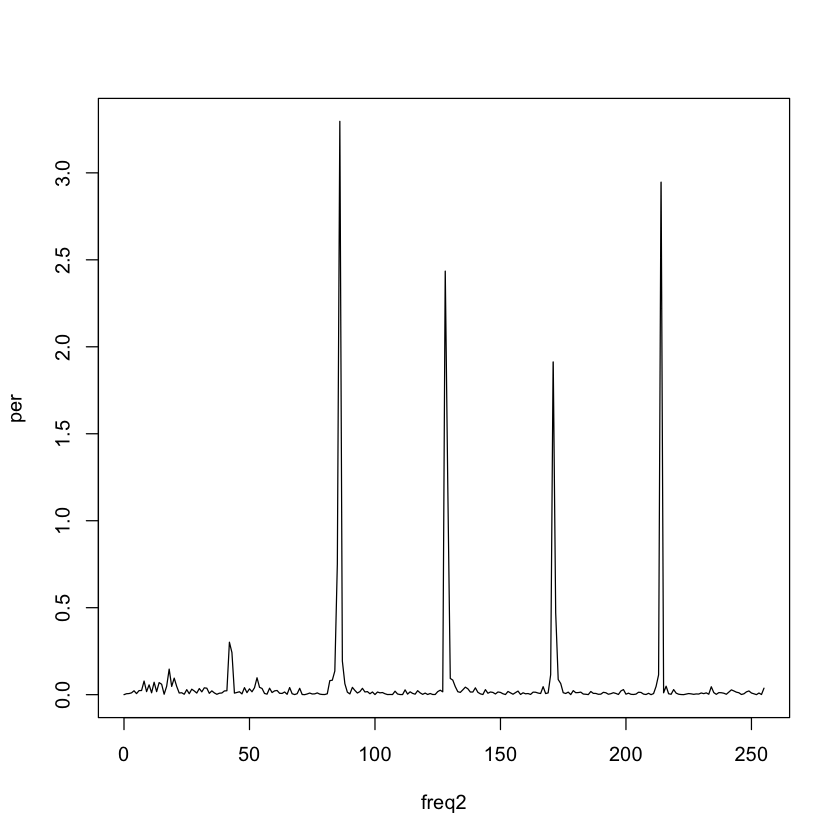

In [10]:
x <- dlindprod
FF = abs(fft(x-mean(x)))^2/length(x)  # Mod() and abs() same here 
n_adj = length(x)/2 -1
per = (4/length(x))*FF[1:n_adj] # (4/length(x)) is a scaler (vertical axis)
#per = FF[1:n_adj]

# if you want a nice picture: 
freq = (0:(n_adj-1))/length(x)
freq2 = (0:(n_adj-1))
#freq2 = (1:length(x)-1)/length(x)
plot(freq, per, type="l")

group = as.matrix(cbind(per,freq))
plot(freq2, per, type="l")

Note that `fft()` returns a time series of `length(x)` (print per to see this).
